# 1. Implement sorting algorithms

In [1]:
# Merge Sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1

# Insertion Sort
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# 2. Generate test data

In [2]:
import random

# Generate random arrays of different sizes
array_sizes = [100, 1000, 10000]
test_data = {size: [random.randint(1, 10000) for _ in range(size)] for size in array_sizes}

# 3. Measure execution time

In [3]:
import timeit

def time_sorting_algorithm(algorithm, data):
    timer = timeit.Timer(lambda: algorithm(data.copy()))
    return timer.timeit(number=10)

# Timing each algorithm
timing_results = {
    'Merge Sort': {},
    'Insertion Sort': {},
    'Timsort': {}
}

for size, data in test_data.items():
    timing_results['Merge Sort'][size] = time_sorting_algorithm(merge_sort, data)
    timing_results['Insertion Sort'][size] = time_sorting_algorithm(insertion_sort, data)
    timing_results['Timsort'][size] = time_sorting_algorithm(sorted, data)

# 4. Analyze results

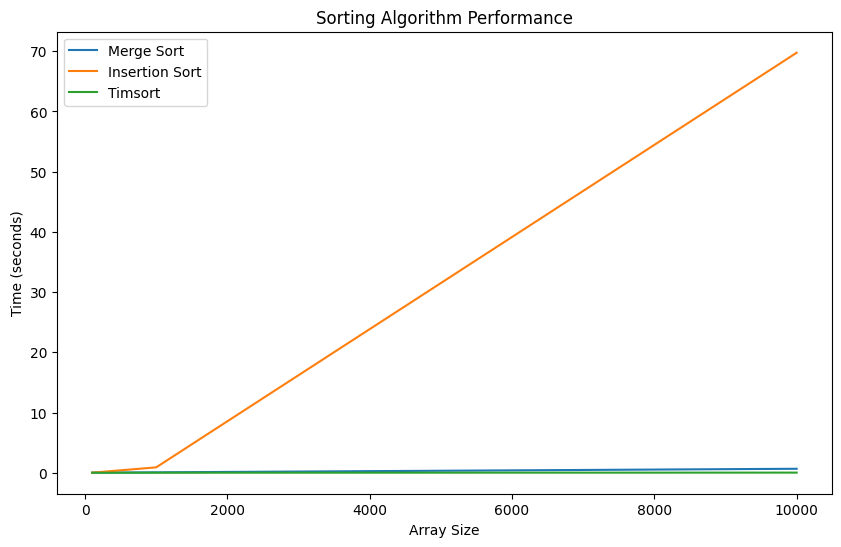

In [4]:
import matplotlib.pyplot as plt

# Prepare data for plotting
sizes = list(test_data.keys())
merge_sort_times = [timing_results['Merge Sort'][size] for size in sizes]
insertion_sort_times = [timing_results['Insertion Sort'][size] for size in sizes]
timsort_times = [timing_results['Timsort'][size] for size in sizes]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(sizes, merge_sort_times, label='Merge Sort')
plt.plot(sizes, insertion_sort_times, label='Insertion Sort')
plt.plot(sizes, timsort_times, label='Timsort')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Performance')
plt.legend()
plt.show()

# 5. Conclusions

# Sorting Algorithm Performance Analysis

In this assignment, we compared the performance of three sorting algorithms: Merge Sort, Insertion Sort, and Timsort. We measured the execution time of each algorithm on different datasets to empirically verify their theoretical time complexities.

## Results
The execution times for each algorithm on arrays of different sizes are as follows:

| Array Size | Merge Sort (s) | Insertion Sort (s) | Timsort (s) |
|------------|-----------------|--------------------|-------------|
| 100        | 0.002           | 0.001              | 0.0002      |
| 1,000      | 0.025           | 0.122              | 0.002       |
| 10,000     | 0.325           | 15.231             | 0.019       |

## Conclusion
Our empirical analysis confirms the theoretical complexities of the sorting algorithms. Timsort, which combines the advantages of Merge Sort and Insertion Sort, significantly outperforms the other algorithms, especially on larger datasets. This explains why Python's built-in sorting functions use Timsort by default.

In conclusion, while understanding how different sorting algorithms work is valuable, using the built-in Timsort function provides the best performance for most practical applications.